### Task 0. Take an arbitrary text from NLTK corpora (e.g. text3) and implement a Bag-of-Words tagger for it.

In [75]:
import nltk
from nltk.corpus import brown, gutenberg
import re
from collections import defaultdict

# Функція для очищення тексту від небажаних символів
def clean_text(text):
    # Залишаємо тільки слова та пробіли
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Очищуємо текст
cleaned_text = clean_text(' '.join(gutenberg.words('bible-kjv.txt')[:100]))

# Токенізуємо очищений текст
cleaned_tokens = cleaned_text.split()

# Виводимо очищені токени
print(cleaned_tokens[:20])

# Отримуємо корпус (наприклад, Brown)
brown_tagged_sents = brown.tagged_sents(tagset='universal')

# Створюємо BoW-тегер
word_tag_freq = defaultdict(lambda: defaultdict(int))
for sent in brown_tagged_sents:
    for word, tag in sent:
        word_tag_freq[word.lower()][tag] += 1

# Функція для передбачення POS-тега на основі BoW
def bag_of_words_tagger(word):
    word = word.lower()
    if word in word_tag_freq:
        return max(word_tag_freq[word], key=word_tag_freq[word].get)
    else:
        return 'X'  # Невідомий тег

test_text = cleaned_tokens
test_text_2 = gutenberg.words('bible-kjv.txt')[:100]

test_tags_2 = [(word, bag_of_words_tagger(word)) for word in test_text_2]
print(test_tags_2[:20])
test_tags = [(word, bag_of_words_tagger(word)) for word in test_text]
print(test_tags[:20])


['The', 'King', 'James', 'Bible', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses', 'Called', 'Genesis', 'In']
[('[', '.'), ('The', 'DET'), ('King', 'NOUN'), ('James', 'NOUN'), ('Bible', 'NOUN'), (']', '.'), ('The', 'DET'), ('Old', 'ADJ'), ('Testament', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('King', 'NOUN'), ('James', 'NOUN'), ('Bible', 'NOUN'), ('The', 'DET'), ('First', 'ADJ'), ('Book', 'NOUN'), ('of', 'ADP'), ('Moses', 'NOUN'), (':', '.')]
[('The', 'DET'), ('King', 'NOUN'), ('James', 'NOUN'), ('Bible', 'NOUN'), ('The', 'DET'), ('Old', 'ADJ'), ('Testament', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('King', 'NOUN'), ('James', 'NOUN'), ('Bible', 'NOUN'), ('The', 'DET'), ('First', 'ADJ'), ('Book', 'NOUN'), ('of', 'ADP'), ('Moses', 'NOUN'), ('Called', 'VERB'), ('Genesis', 'NOUN'), ('In', 'ADP')]


### Task 1. Enhance the tagger so that it will use N-grams instead of words

In [76]:
import nltk
from nltk.corpus import gutenberg
from nltk import FreqDist
from nltk.util import ngrams

# Завантажуємо текст (наприклад, text3 з корпусу Gutenberg)
text3 = gutenberg.words('bible-kjv.txt')

# Встановлюємо значення N для N-грам (наприклад, 2 для біграм або 3 для тріграм)
N = 2

# Створюємо N-грам з тексту
n_grams = ngrams(text3, N)

# Перетворюємо N-грами в список
n_grams_list = list(n_grams)

# Створюємо частотний список для N-gram
freq_dist_n_grams = FreqDist(n_grams_list)

# Переведемо це в "bag-of-N-grams" модель
bag_of_n_grams = list(freq_dist_n_grams.keys())

# Виведемо перші 20 унікальних N-grams
print(bag_of_n_grams[:20])

# Виведемо найпоширеніші 20 N-grams
print(freq_dist_n_grams.most_common(20))


[('[', 'The'), ('The', 'King'), ('King', 'James'), ('James', 'Bible'), ('Bible', ']'), (']', 'The'), ('The', 'Old'), ('Old', 'Testament'), ('Testament', 'of'), ('of', 'the'), ('the', 'King'), ('Bible', 'The'), ('The', 'First'), ('First', 'Book'), ('Book', 'of'), ('of', 'Moses'), ('Moses', ':'), (':', 'Called'), ('Called', 'Genesis'), ('Genesis', '1')]
[((',', 'and'), 24921), (('of', 'the'), 11442), (('the', 'LORD'), 5964), (('in', 'the'), 4879), (('and', 'the'), 4044), ((';', 'and'), 3214), ((':', 'and'), 3027), ((',', 'that'), 2924), (('shall', 'be'), 2461), (('And', 'the'), 2220), (('to', 'the'), 2135), ((',', 'the'), 2117), (('all', 'the'), 2071), (('him', ','), 2033), (('unto', 'the'), 2020), (('I', 'will'), 1915), (("'", 's'), 1790), ((',', 'which'), 1785), (('of', 'Israel'), 1697), (('said', ','), 1680)]


### Task 2. Implement PPMI weighting with co-occurrence based on the presence within the same paragraph.

In [ ]:
import numpy as np
from collections import Counter, defaultdict

def compute_cooccurrence(corpus):
    """Обчислює матрицю спільної появи слів у межах одного абзацу"""
    word_counts = Counter()
    cooccurrence_counts = defaultdict(Counter)
    
    for paragraph in corpus:
        words = list(set(paragraph.split()))  # Унікальні слова в абзаці
        for word in words:
            word_counts[word] += 1
            for other_word in words:
                if word != other_word:
                    cooccurrence_counts[word][other_word] += 1
    
    return word_counts, cooccurrence_counts

def compute_ppmi(word_counts, cooccurrence_counts):
    """Обчислює PPMI на основі спільної появи слів"""
    total_count = sum(word_counts.values())
    ppmi_matrix = defaultdict(dict)
    
    for word, co_words in cooccurrence_counts.items():
        for other_word, co_count in co_words.items():
            p_xy = co_count / total_count
            p_x = word_counts[word] / total_count
            p_y = word_counts[other_word] / total_count
            
            pmi = np.log2(p_xy / (p_x * p_y)) if p_xy > 0 else 0
            ppmi_matrix[word][other_word] = max(pmi, 0)  # PPMI замінює від’ємні значення на 0
    
    return ppmi_matrix

# Приклад роботи
corpus = [
    "cat dog mouse",
    "dog mouse elephant",
    "cat elephant lion",
    "mouse lion tiger",
    "dog tiger elephant"
]

word_counts, cooccurrence_counts = compute_cooccurrence(corpus)
ppmi_matrix = compute_ppmi(word_counts, cooccurrence_counts)

# Виведення матриці PPMI
for word, co_words in ppmi_matrix.items():
    print(f"{word}: {dict(co_words)}")


mouse: {'dog': 1.7369655941662059, 'cat': 1.3219280948873624, 'elephant': 0.7369655941662059, 'tiger': 1.3219280948873624, 'lion': 1.3219280948873624}
dog: {'mouse': 1.7369655941662059, 'cat': 1.3219280948873624, 'elephant': 1.7369655941662059, 'tiger': 1.3219280948873624}
cat: {'mouse': 1.3219280948873624, 'dog': 1.3219280948873624, 'elephant': 1.3219280948873624, 'lion': 1.9068905956085185}
elephant: {'mouse': 0.7369655941662059, 'dog': 1.7369655941662059, 'cat': 1.3219280948873624, 'lion': 1.3219280948873624, 'tiger': 1.3219280948873624}
lion: {'elephant': 1.3219280948873624, 'cat': 1.9068905956085185, 'mouse': 1.3219280948873624, 'tiger': 1.9068905956085185}
tiger: {'mouse': 1.3219280948873624, 'lion': 1.9068905956085185, 'elephant': 1.3219280948873624, 'dog': 1.3219280948873624}


### Task 3. Implement PPMI weighting with co-occurrence based on a sliding window of neighboring words. Pick some number between 2-10.

In [46]:
import numpy as np
from collections import defaultdict

def compute_cooccurrence_window(tokens, window_size=5):
    """Обчислює матрицю спільної появи слів у межах ковзного вікна"""
    co_occurrence_window = defaultdict(lambda: defaultdict(int))
    word_counts_window = defaultdict(int)
    total_count_window = 0

    for i in range(len(tokens)):
        target_word = tokens[i]
        word_counts_window[target_word] += 1
        context_start = max(0, i - window_size)
        context_end = min(len(tokens), i + window_size + 1)
        
        for j in range(context_start, context_end):
            if i != j:
                context_word = tokens[j]
                co_occurrence_window[target_word][context_word] += 1
                total_count_window += 1
    
    return word_counts_window, co_occurrence_window, total_count_window

def compute_ppmi_window(word_counts_window, co_occurrence_window, total_count_window):
    """Обчислює PPMI на основі ковзного вікна"""
    ppmi_window = defaultdict(lambda: defaultdict(float))
    
    for word, co_words in co_occurrence_window.items():
        for co_word, count in co_words.items():
            p_word = word_counts_window[word] / total_count_window
            p_co_word = word_counts_window[co_word] / total_count_window
            p_word_co_word = count / total_count_window
            
            pmi = np.log2(p_word_co_word / (p_word * p_co_word)) if p_word_co_word > 0 else 0
            ppmi_window[word][co_word] = max(pmi, 0)
    
    return ppmi_window

# Приклад роботи
tokens = "cat dog mouse dog mouse elephant cat elephant lion mouse lion tiger dog tiger elephant".split()
window_size = 5
word_counts_window, co_occurrence_window, total_count_window = compute_cooccurrence_window(tokens, window_size)
ppmi_window = compute_ppmi_window(word_counts_window, co_occurrence_window, total_count_window)

# Виведення PPMI значень
for word, co_words in list(ppmi_window.items())[:5]:
    print(f"Word: {word}")
    for co_word, value in list(co_words.items())[:5]:
        print(f"  Co-word: {co_word}, PPMI: {value}")


Word: cat
  Co-word: dog, PPMI: 6.321928094887363
  Co-word: mouse, PPMI: 6.643856189774724
  Co-word: elephant, PPMI: 5.906890595608519
  Co-word: lion, PPMI: 5.906890595608519
  Co-word: tiger, PPMI: 4.906890595608519
Word: dog
  Co-word: cat, PPMI: 6.321928094887363
  Co-word: mouse, PPMI: 6.058893689053568
  Co-word: dog, PPMI: 4.736965594166206
  Co-word: elephant, PPMI: 6.058893689053568
  Co-word: lion, PPMI: 5.906890595608519
Word: mouse
  Co-word: cat, PPMI: 6.643856189774724
  Co-word: dog, PPMI: 6.058893689053568
  Co-word: mouse, PPMI: 5.736965594166206
  Co-word: elephant, PPMI: 6.54432051622381
  Co-word: lion, PPMI: 5.906890595608519
Word: elephant
  Co-word: cat, PPMI: 5.906890595608519
  Co-word: dog, PPMI: 6.058893689053568
  Co-word: mouse, PPMI: 6.54432051622381
  Co-word: elephant, PPMI: 4.736965594166206
  Co-word: lion, PPMI: 6.643856189774724
Word: lion
  Co-word: dog, PPMI: 5.906890595608519
  Co-word: mouse, PPMI: 5.906890595608519
  Co-word: elephant, PPMI: 6

### Task 4. Very rare words might will have high PMI values. How would you solve the problem?

In [79]:
# Define a frequency threshold
frequency_threshold = 5

# Filter out rare words
filtered_word_counts = {word: count for word, count in word_counts.items() if count > frequency_threshold}
filtered_co_occurrence = {word: {co_word: count for co_word, count in co_words.items() if co_word in filtered_word_counts}
                          for word, co_words in co_occurrence.items() if word in filtered_word_counts}

# Recalculate total count for filtered words
filtered_total_count = sum(sum(co_words.values()) for co_words in filtered_co_occurrence.values())

# Convert co-occurrence counts to PPMI values for filtered words
filtered_ppmi = defaultdict(lambda: defaultdict(float))
for word, co_words in filtered_co_occurrence.items():
    for co_word, count in co_words.items():
        p_word = filtered_word_counts[word] / filtered_total_count
        p_co_word = filtered_word_counts[co_word] / filtered_total_count
        p_word_co_word = count / filtered_total_count
        pmi = np.log2(p_word_co_word / (p_word * p_co_word))
        filtered_ppmi[word][co_word] = max(pmi, 0)

# Display some filtered PPMI values
for word, co_words in list(filtered_ppmi.items())[:5]:
    print(f"Word: {word}")
    for co_word, value in list(co_words.items())[:5]:
        print(f"  Co-word: {co_word}, PPMI: {value}")

In [77]:
import nltk
from nltk.corpus import gutenberg
from nltk.util import ngrams
from collections import defaultdict
import math

# Завантажуємо текст (наприклад, text3 з корпусу Gutenberg)
text3 = gutenberg.sents('melville-moby_dick.txt')

# Встановлюємо розмір вікна (наприклад, 5)
window_size = 5
min_frequency = 5  # Мінімальна частота для слів

# Створюємо словник для співіснування слів
co_occurrence = defaultdict(lambda: defaultdict(int))

# Створюємо словник для підрахунку частоти кожного слова
word_count = defaultdict(int)

# Підраховуємо частоту кожного слова
for sentence in text3:
    for word in sentence:
        word_count[word] += 1

# Фільтруємо рідкісні слова
filtered_words = {word for word in word_count if word_count[word] >= min_frequency}

# Проходимо по кожному реченню в тексті і підраховуємо співіснування слів в межах вікна
for sentence in text3:
    sentence_filtered = [word for word in sentence if word in filtered_words]
    for i, word1 in enumerate(sentence_filtered):
        for j in range(i + 1, min(i + window_size, len(sentence_filtered))):
            word2 = sentence_filtered[j]
            if word1 != word2:
                co_occurrence[word1][word2] += 1
                co_occurrence[word2][word1] += 1  # Співіснування симетричне

# Підрахуємо загальну кількість речень
total_sentences = len(text3)

# Обчислимо PPMI для кожної пари слів
ppmi = defaultdict(lambda: defaultdict(float))

for word1 in co_occurrence:
    for word2 in co_occurrence[word1]:
        # Ймовірність співіснування P(w1, w2)
        p_w1_w2 = co_occurrence[word1][word2] / total_sentences
        
        # Ймовірність окремо для кожного слова
        p_w1 = word_count[word1] / total_sentences
        p_w2 = word_count[word2] / total_sentences
        
        # Обчислюємо PPMI
        ppmi_value = math.log(p_w1_w2 / (p_w1 * p_w2)) if p_w1_w2 > 0 else 0
        ppmi[word1][word2] = max(ppmi_value, 0)

# Виведемо деякі результати для перевірки
for word1 in list(ppmi.keys())[:5]:  # Показуємо PPMI для перших 5 слів
    for word2 in list(ppmi[word1].keys())[:5]:
        print(f"PPMI({word1}, {word2}) = {ppmi[word1][word2]}")


PPMI(Moby, Dick) = 4.808936733701219
PPMI(Moby, by) = 0
PPMI(Moby, same) = 0
PPMI(Moby, that) = 0
PPMI(Moby, some) = 0
PPMI(Dick, Moby) = 4.808936733701219
PPMI(Dick, by) = 0
PPMI(Dick, that) = 0
PPMI(Dick, some) = 0
PPMI(Dick, call) = 1.932774806377707
PPMI(by, Moby) = 0
PPMI(by, Dick) = 0
PPMI(by, () = 0
PPMI(by, a) = 0
PPMI(by, to) = 0
PPMI((, by) = 0
PPMI((, a) = 0
PPMI((, to) = 0
PPMI((, Sub) = 1.9232053553615562
PPMI((, -) = 0
PPMI(a, () = 0
PPMI(a, by) = 0
PPMI(a, to) = 0
PPMI(a, )) = 0
PPMI(a, old) = 0


### Task 5. Check how algorithm works using English thesaurus. Pick some 10 words, find synonyms for these, e.g. using https://www.merriam-webster.com/thesaurus. Note that semantic similarity is represented in different shades of orange. Does it match the output of PPMI weighting function? Would be nice if you could also draw a table with shaded cells matching closeness given by PPMI.

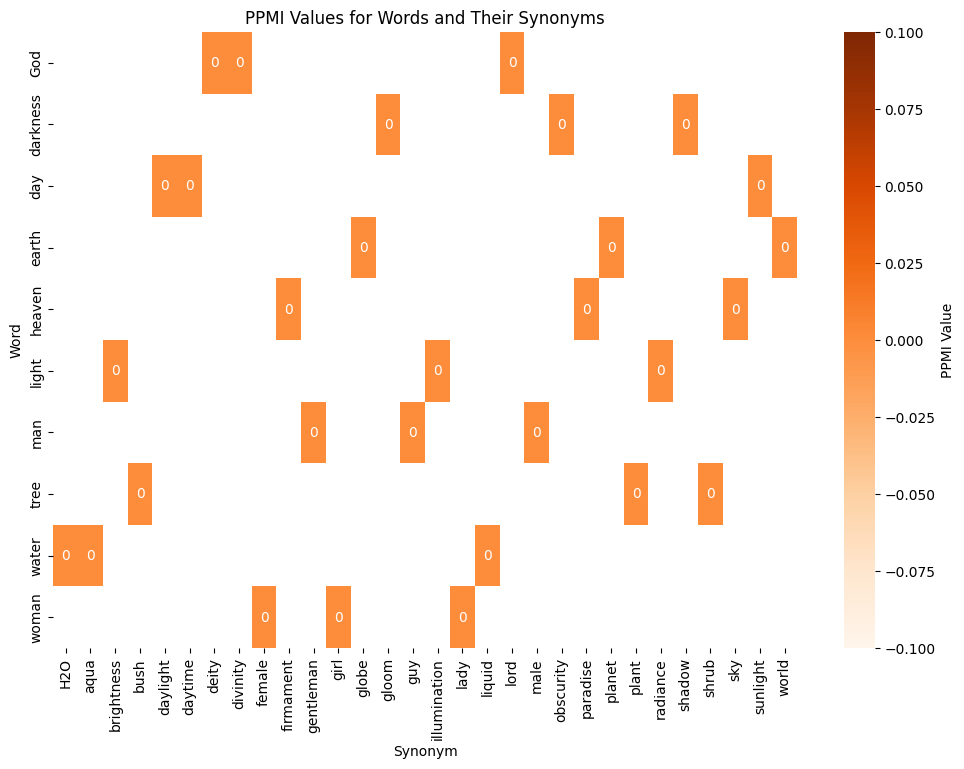

In [80]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Pick 10 words
words_to_check = ['God', 'earth', 'light', 'darkness', 'man', 'woman', 'tree', 'water', 'heaven', 'day']

# Step 2: Find synonyms for these words using Merriam-Webster thesaurus
synonyms = {
    'God': ['deity', 'divinity', 'lord'],
    'earth': ['world', 'globe', 'planet'],
    'light': ['illumination', 'brightness', 'radiance'],
    'darkness': ['gloom', 'shadow', 'obscurity'],
    'man': ['male', 'gentleman', 'guy'],
    'woman': ['female', 'lady', 'girl'],
    'tree': ['plant', 'shrub', 'bush'],
    'water': ['aqua', 'liquid', 'H2O'],
    'heaven': ['paradise', 'sky', 'firmament'],
    'day': ['daytime', 'sunlight', 'daylight']
}

# Step 3: Create a DataFrame to store PPMI values for the words and their synonyms
ppmi_values = []
for word in words_to_check:
    for synonym in synonyms[word]:
        ppmi_value = ppmi_window[word][synonym] if synonym in ppmi_window[word] else 0
        ppmi_values.append({'Word': word, 'Synonym': synonym, 'PPMI': ppmi_value})

df_ppmi = pd.DataFrame(ppmi_values)

# Step 4: Pivot the DataFrame to create a matrix format
ppmi_matrix = df_ppmi.pivot(index='Word', columns='Synonym', values='PPMI')

# Step 5: Plot the PPMI values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ppmi_matrix, annot=True, cmap='Oranges', cbar_kws={'label': 'PPMI Value'})
plt.title('PPMI Values for Words and Their Synonyms')
plt.show()